<a href="https://colab.research.google.com/github/RashidNoor42/Image-Classification/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to have a single channel (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

print("Training set shape:", train_images.shape)
print("Test set shape:", test_images.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


In [2]:
# Build MLP Model
mlp_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 image into 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (for 10 classes)
])

# Compile the model
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_images, test_labels)
print("MLP Test accuracy:", mlp_test_acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8552 - loss: 0.5086 - val_accuracy: 0.9517 - val_loss: 0.1629
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9578 - loss: 0.1488 - val_accuracy: 0.9642 - val_loss: 0.1170
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9717 - loss: 0.0981 - val_accuracy: 0.9682 - val_loss: 0.1037
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9797 - loss: 0.0693 - val_accuracy: 0.9744 - val_loss: 0.0855
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9757 - val_loss: 0.0767
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0428 - val_accuracy: 0.9741 - val_loss: 0.0772
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9896 - loss: 0.0360 - val_accuracy: 0.9770 - val_loss: 0.0746
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9927 - loss: 0.0291 - val_accuracy: 0

In [9]:
# Build CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters of size 3x3
    layers.MaxPooling2D((2, 2)),  # Max pooling layer to downsample
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third convolutional layer
    layers.Flatten(),  # Flatten the output of the convolutional layers
    layers.Dense(64, activation='relu'),  # Fully connected layer with 64 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for classification
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)
print("CNN Test accuracy:", cnn_test_acc)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8648 - loss: 0.4357 - val_accuracy: 0.9828 - val_loss: 0.0540
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9835 - loss: 0.0560 - val_accuracy: 0.9863 - val_loss: 0.0408
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9883 - val_loss: 0.0349
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9923 - loss: 0.0264 - val_accuracy: 0.9885 - val_loss: 0.0335
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9913 - val_loss: 0.0261
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9887 - loss: 0.0310
CNN Test accuracy: 0.9912999868392944


In [4]:
# Compare results
print(f"MLP Test Accuracy: {mlp_test_acc}")
print(f"CNN Test Accuracy: {cnn_test_acc}")

MLP Test Accuracy: 0.9750999808311462
CNN Test Accuracy: 0.9883999824523926


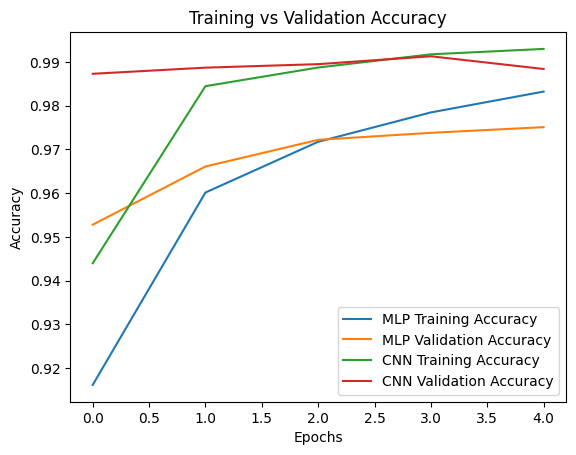

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy for MLP
plt.plot(mlp_history.history['accuracy'], label='MLP Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy')

# Plot accuracy for CNN
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [11]:
# Save the models
mlp_model.save('mlp_model.keras')
cnn_model.save('cnn_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


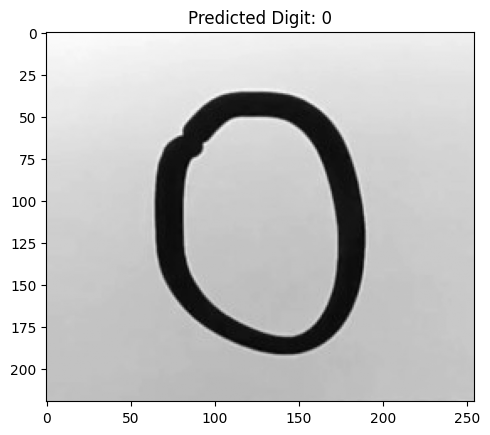

The predicted digit is: 0


In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved models
mlp_model = tf.keras.models.load_model('mlp_model.keras')
cnn_model = tf.keras.models.load_model('cnn_model.keras')

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    # Load the image, convert it to grayscale (L mode), and resize it to 28x28
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28), Image.Resampling.LANCZOS)  # Resize to 28x28 pixels using LANCZOS filter

    # Invert the colors (MNIST dataset has white background, black digits)
    img = np.invert(img)

    # Convert the image to a NumPy array, normalize it, and add batch dimension
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = img_array.reshape((1, 28, 28, 1))  # Reshape to match model input

    return img_array

# Function to predict the digit using the model
def predict_digit(model, image_path):
    # Preprocess the image
    processed_img = preprocess_image(image_path)

    # Make the prediction
    predictions = model.predict(processed_img)
    predicted_label = np.argmax(predictions)  # Get the index of the highest probability

    return predicted_label

# Test the function with an example image
image_path = '/content/image (2).png'  # Replace with the path to the image you want to test

# Choose either the MLP or CNN model for prediction
model_to_use = cnn_model  # or mlp_model

# Predict the digit using the chosen model
predicted_digit = predict_digit(model_to_use, image_path)

# Display the image and the prediction
img = Image.open(image_path).convert('L')
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()

print(f"The predicted digit is: {predicted_digit}")
